## Multiple Linear Regression Quick start

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import math

## Load Data

In [6]:
url = 'https://raw.githubusercontent.com/Ajay-user/ML-DL-RL-repo/master/Regression/Datasets/Admission.csv'
admission_df = pd.read_csv(url)
admission_df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


## Explore the Data

In [7]:
admission_df.describe().iloc[:3,:]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609


In [8]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


## Visualize the data

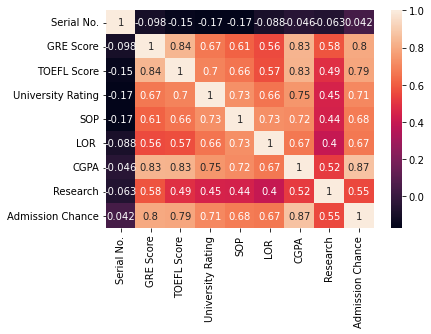

In [14]:
sns.heatmap(admission_df.corr(), annot=True);

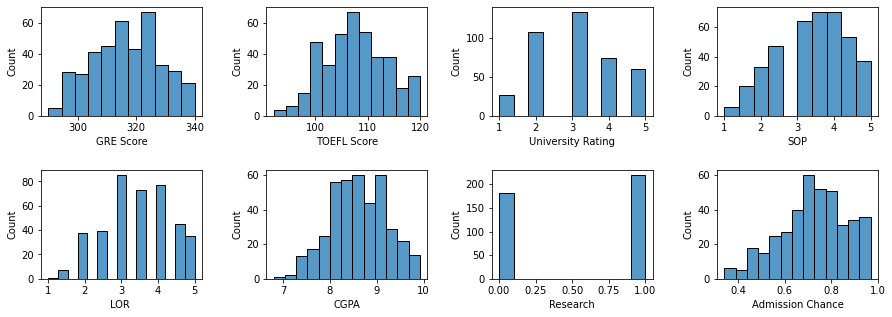

In [66]:
fig, ax = plt.subplots(2,4, figsize=(15,5))
for i, col in enumerate(admission_df.columns):
    if col!='Serial No.':
        sns.histplot(admission_df[col], ax=ax[0][i-1] if i<5 else ax[1][i-5])
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
    

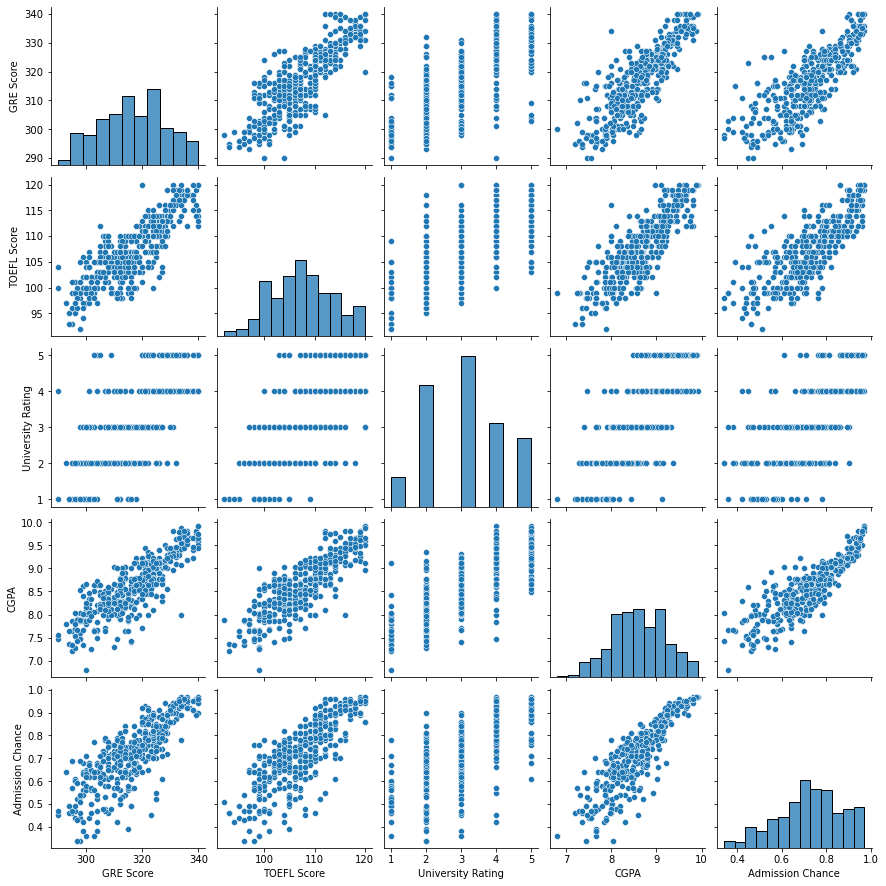

In [69]:
sns.pairplot(admission_df[['GRE Score', 'TOEFL Score', 'University Rating','CGPA','Admission Chance']]);

## Features and Target variables

In [98]:
X = admission_df.drop(columns=['Serial No.','Admission Chance'])
y = admission_df['Admission Chance']
print('Shape of Independent variable',X.shape)
print('Shape of Dependent variable',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print('Shape of Training data X',X_train.shape)
print('Shape of Training data y',y_train.shape)
print('Shape of Testing data X',X_test.shape)
print('Shape of Testing data y',y_test.shape)

Shape of Independent variable (400, 7)
Shape of Dependent variable (400,)
Shape of Training data X (300, 7)
Shape of Training data y (300,)
Shape of Testing data X (100, 7)
Shape of Testing data y (100,)


## Modeling

In [99]:
# utiltiy
def model_training(X=X_train, y=y_train):
    # model 
    model = LinearRegression()
    # training
    model.fit(X, y)
    # print model coefficent and y-intercept
    # dependent_var = y_intercept + coef1*independent_var1 + coef2*independent_var2
    print('Model coefficent', model.coef_)
    print('Model intercept', model.intercept_)
    return model

In [100]:
model_1 = model_training()

Model coefficent [ 0.00143805  0.00327583  0.00576869 -0.00435171  0.0204509   0.11416695
  0.02818993]
Model intercept -1.1487425132676559


## Model coefficents

In [105]:
model_1_coef = pd.DataFrame(data={'coefficent':model.coef_}, index=X_train.columns)
model_1_coef

,coefficent
GRE Score,0.019105
TOEFL Score,0.021127
University Rating,0.004187
SOP,0.002592
LOR,0.015134
CGPA,0.070025
Research,0.009885


In [107]:
preds = model_1.predict(X_test)

## Evaluation

In [108]:
# R-squared
r2 = r2_score(y_test, preds)
# MAE
mae = mean_absolute_error(y_test, preds)
# MSE
mse = mean_squared_error(y_test, preds)
# MAPE 
mape = np.mean( np.abs( (y_test-preds)/y_test  ) )*100

print('R-squared',r2)
print('MSE', mse)
print('MAE', mae)
print('MAPE',mape)

R-squared 0.7854090621422791
MSE 0.005025496590052452
MAE 0.05116619880259871
MAPE 8.839682071387443


## Improve the model

In [161]:

# preprocessing  

cat_features = ['University Rating', 'Research']
cat_transformer = OneHotEncoder()

int_features = ['GRE Score', 'TOEFL Score', 'CGPA']
int_transformer = StandardScaler()

transformer = ColumnTransformer([
    ('scale', int_transformer , int_features),
    ('OHE', cat_transformer, cat_features) 
], remainder='passthrough')

# apply the transformation
X_transformed = transformer.fit_transform(X_train)

model_2 = model_training(X_transformed, y_train)

Model coefficent [ 0.01622199  0.02054862  0.06852926 -0.00449369 -0.00630877 -0.00623749
  0.00179629  0.01524366 -0.0142171   0.0142171  -0.0037017   0.02026807]
Model intercept 0.6710195460046597


In [162]:
# Making predictions
X_test_transformed = transformer.transform(X_test)

y_preds = model_2.predict(X_test_transformed)

In [163]:
# Evaluation

# R-squared
r2 = r2_score(y_test, y_preds)
# MAE
mae = mean_absolute_error(y_test, y_preds)
# MSE
mse = mean_squared_error(y_test, y_preds)
# MAPE 
mape = np.mean( np.abs( (y_test-y_preds)/y_test  ) )*100

print('R-squared',r2)
print('MSE', mse)
print('MAE', mae)
print('MAPE',mape)

R-squared 0.7875743686992668
MSE 0.004974787362406619
MAE 0.051211537172638384
MAPE 8.848247397632887


## Visualize Preditions

In [168]:
col=['GRE Score', 'CGPA']
model_3 = model_training(X_train[col], y_train)

Model coefficent [0.00274144 0.15833143]
Model intercept -1.5009079177347846


In [167]:
def get_axes(model, df, col=['GRE Score', 'CGPA']):
    
    x = np.linspace(df[col[0]].min(), df[col[0]].max(), len(df))
    y = np.linspace(df[col[1]].min(), df[col[1]].max(), len(df))
    
    xx, yy = np.meshgrid(x, y)
    
    data = pd.DataFrame(data={'GRE Score':xx.ravel(), 'CGPA':yy.ravel()})
    
    preds = model.predict(data)
    
    zz = preds.reshape(xx.shape)
    
    return xx, yy, zz

In [169]:
x, y, z = get_axes(model_3, X_test)

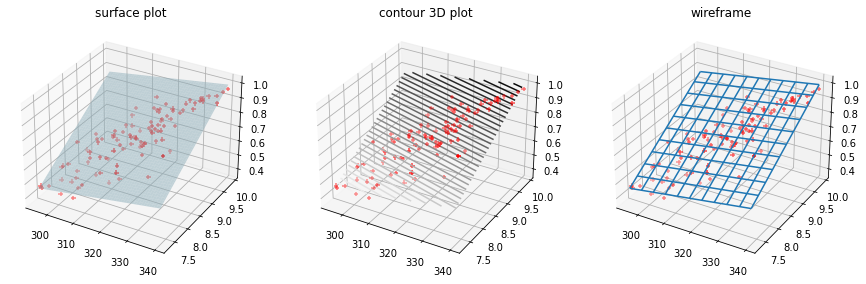

In [197]:
fig = plt.figure(figsize=(15,15))

ax = plt.subplot(1,3,1, projection='3d')
ax.scatter3D(X_test['GRE Score'], X_test['CGPA'], y_test, marker='+', color='r')
ax.plot_surface(x, y, z, color='lightblue', alpha=0.5)
ax.set_title('surface plot');


ax = plt.subplot(1,3,2, projection='3d')
ax.scatter3D(X_test['GRE Score'], X_test['CGPA'], y_test, marker='+', color='r')
ax.contour3D(x, y, z, 50, cmap=plt.cm.binary)
ax.set_title('contour 3D plot');

ax = plt.subplot(1,3,3, projection='3d')
ax.scatter3D(X_test['GRE Score'], X_test['CGPA'], y_test, marker='+', color='r')
ax.plot_wireframe(x, y, z, rcount=10, ccount=10, cmap=plt.cm.Accent)
ax.set_title('wireframe');

plt.show()